# A notebook to predict the wine quality given different parameters for the wine

In this notebook, we are creating multiple machine learning models to predict the wine quality. Our process followed the following Order:

        1.Visualization : To see how the wine-quality are distributed with different parameters of wine.
        2.Machine learning model developments:
            Create RandomForest classifier, predict and test accuracy.
            Create Stochastic Gradient Decent (SGD) classifier, predict and test accuracy.
            Create support vector classifier, predict and test accuracy.
        3. Attempt to increase accuracy of models:
            Create GridSearchCV for Support vector classifier.
                With the best params, create a new Support Vector Classifier.
                Fit the training data with the classifier, and build model.
                Test with classification report and compare with the accuracy of SVC model of step 2.
            Create crossvalidation and fit data.
                Check the accuracy of new model with cross validation. Compare with the RandomForest model of step 2.

### Import necessary packages

In [3]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

### Import data and get information about columns

In [6]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Lets do some plotting to know how the data column are distributed among the dataset

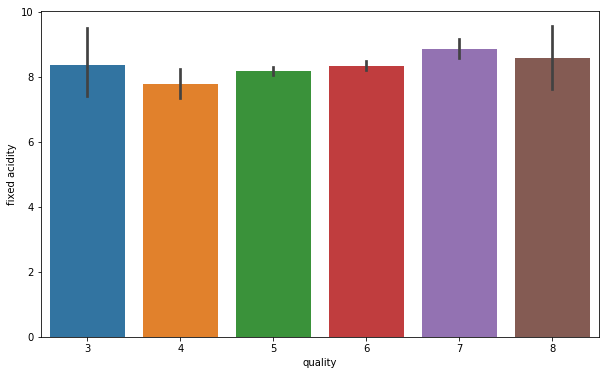

In [8]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

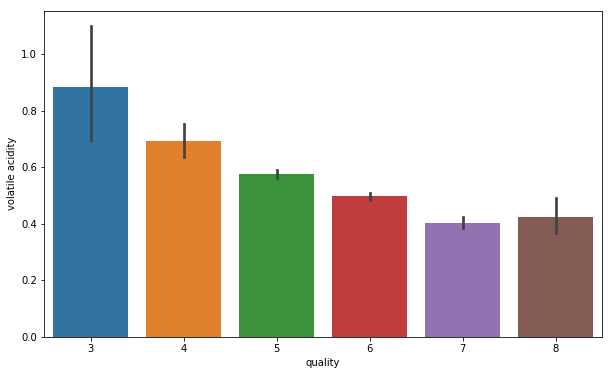

In [9]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

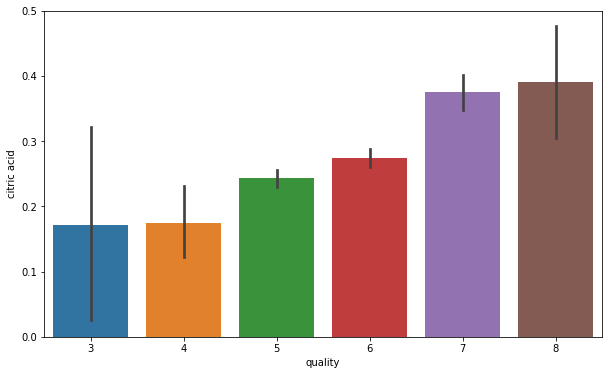

In [10]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

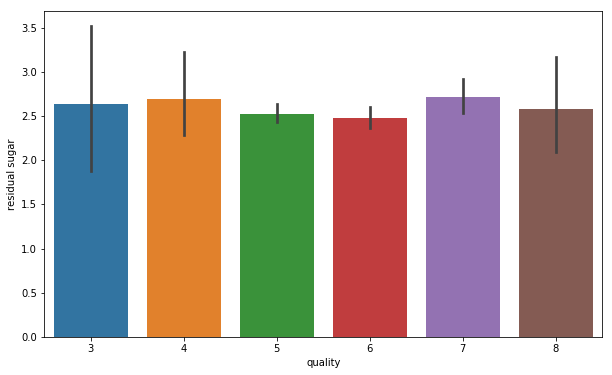

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

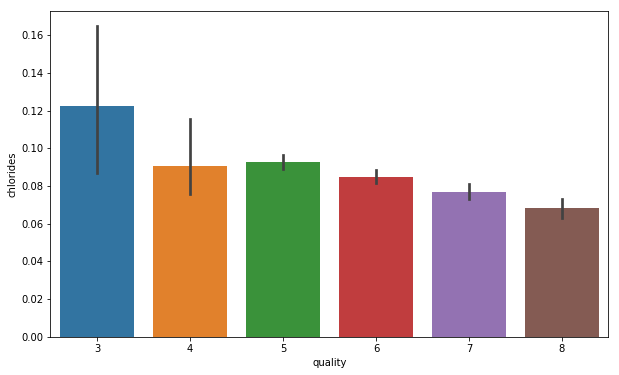

In [12]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)


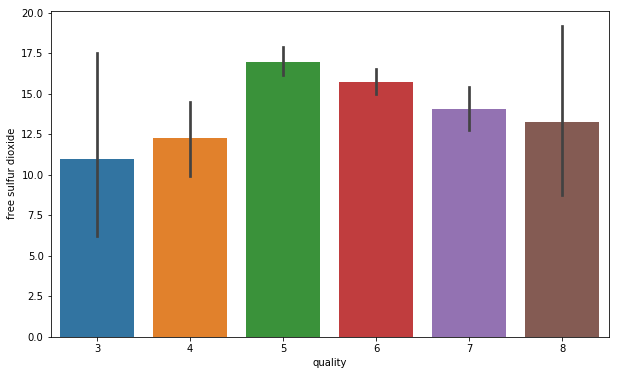

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

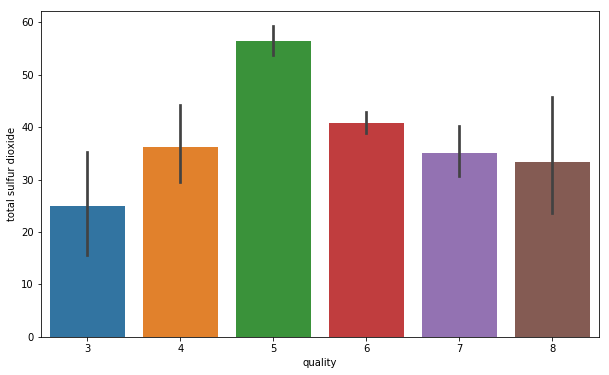

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

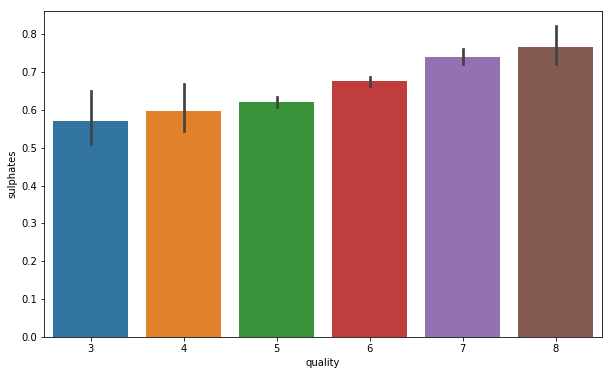

In [15]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

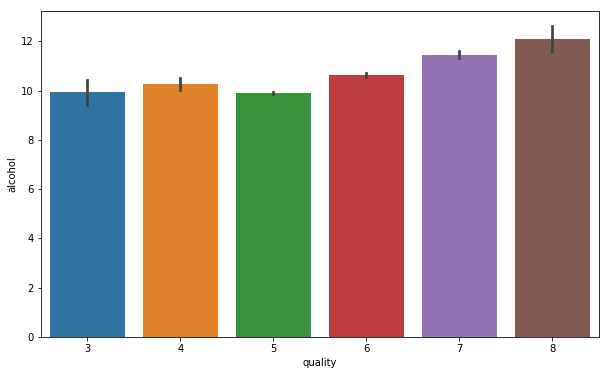

In [16]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing data for performing machine learning

In [17]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [18]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [19]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [20]:
wine['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

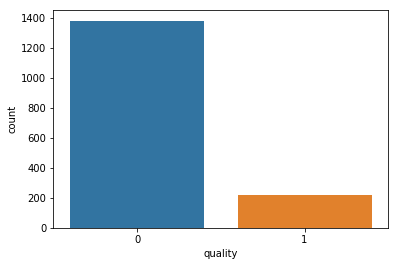

In [21]:
sns.countplot(wine['quality'])


In [22]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [23]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Lets develop machine learning model now..

### Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [30]:
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       273
          1       0.74      0.43      0.54        47

avg / total       0.88      0.89      0.88       320



Random Forest gives us an accuracy of 88%

In [31]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 27  20]]


### Stochastic Gradient Decent Classifier

In [33]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [34]:
print(classification_report(y_test, pred_sgd))


             precision    recall  f1-score   support

          0       0.91      0.92      0.91       273
          1       0.49      0.45      0.47        47

avg / total       0.84      0.85      0.85       320



We can see an accuracy of 84% using Stochastic Gradient Decent Classifier

In [35]:
print(confusion_matrix(y_test, pred_sgd))

[[251  22]
 [ 26  21]]


### Support Vector Classifier

In [36]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [37]:
print(classification_report(y_test, pred_svc))


             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



Support vector classifier gets of 87%

### Lets try to increase the accuracy of the models

### GridSearchCV

In [38]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


In [39]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [41]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       273
          1       0.89      0.34      0.49        47

avg / total       0.90      0.90      0.88       320



SVC improves from 86% to 90% using Grid Search CV

## Cross validation score from RandomForest and SGD

In [42]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9116695374015749

Random forest accuracy increases from 87% to 91 % using cross validation score

## Final conclusion : We find the random forest classifier with cross validation as the most accurate.